In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [97]:
train = pd.read_csv('data/train.csv', index_col=0)
test = pd.read_csv('data/test_x.csv', index_col=0)
submission = pd.read_csv('data/sample_submission.csv', index_col=0)

In [58]:
train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [59]:
train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [68]:
eda_train = train.copy()

In [69]:
Answers = []
for A in eda_train.columns :
    if 'Q' and 'A' in A:
        Answers.append(A)

<AxesSubplot:>

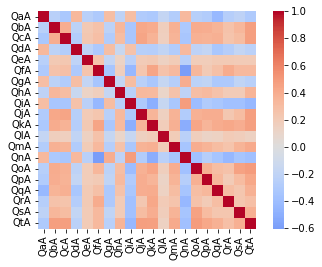

In [70]:
correlations = eda_train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap='coolwarm', square=True, center=0)

In [71]:
for col in eda_train[Answers]:
    print(sorted(eda_train[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [72]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns:
    train[flip] = 6 - eda_train[flip]

<AxesSubplot:>

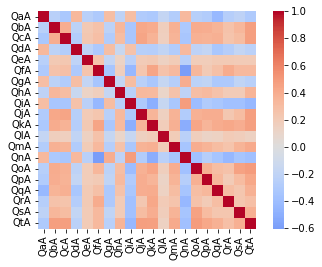

In [73]:
correlations = eda_train[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap='coolwarm', square=True, center=0)

In [77]:
questions = [i for i in list(ascii_lowercase)[:20]]
eda_train['delay'] = eda_train[[('Q'+i+'E') for i in questions]].sum(axis=1)

In [80]:
eda_train['delay'] ** (1/10)

index
0        2.662087
1        2.947932
2        2.800390
3        3.063104
4        2.671078
           ...   
45527    2.580244
45528    2.764092
45529    2.757589
45530    2.737949
45531    2.777787
Name: delay, Length: 45532, dtype: float64

/Users/jeongseunghwan/opt/anaconda3/envs/boost/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jeongseunghwan/opt/anaconda3/envs/boost/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

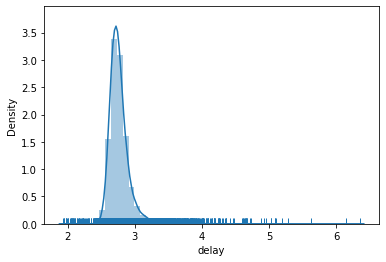

In [82]:
eda_train['delay'] = eda_train['delay'] ** (1/10)
sns.distplot(eda_train['delay'], rug=True)

In [83]:
voted = eda_train[eda_train['voted']==1]
unvoted = eda_train[eda_train['voted']==2]

<AxesSubplot:xlabel='age_group', ylabel='count'>

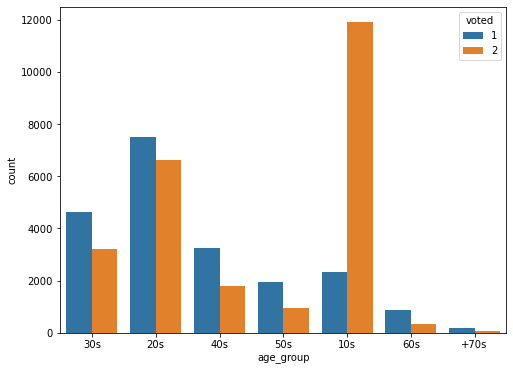

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(data = eda_train, x = 'age_group', hue = eda_train['voted'])

<AxesSubplot:xlabel='married', ylabel='count'>

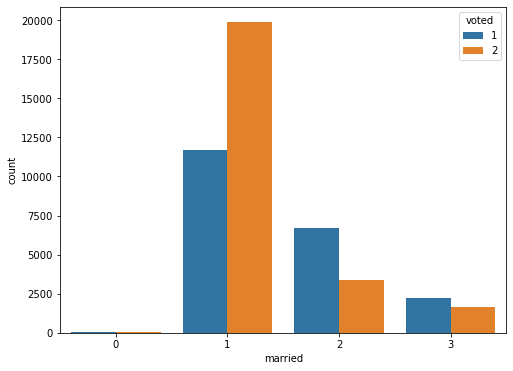

In [85]:
plt.figure(figsize=(8,6))
sns.countplot(data=eda_train, x='married', hue=eda_train['voted'])

In [99]:
X_train = train.copy()
X_train.drop('voted', axis=1, inplace=True)
y_train = train['voted']

In [103]:
dataset = [X_train, test]

In [104]:
questions = [i for i in list(ascii_lowercase)[:20]]
answers = [('Q'+i+'A')for i in questions]

In [105]:
for data in dataset:
    data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
    data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
    data['M'] = -data['QkA']

In [106]:
flipping_columns = ['QeA', 'QfA', 'QkA', 'QqA', 'QrA']
for data in dataset:
    for flip in flipping_columns:
        data[flip] = 6 - data[flip]

In [109]:
flipping_secret_columns = ['QaA', 'QdA', 'QgA', 'QiA', 'QnA']
for data in dataset:
    for flip in flipping_secret_columns:
        data[flip] = 6 - data[flip]

In [110]:
for data in dataset:
    data['Mach_score'] = data[answers].mean(axis=1)

In [111]:
for data in dataset :
    data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
    data['delay'] = data['delay'] ** (1/10)

In [115]:
Ancoms = list(combinations(answers, 2))
for data in dataset:
    for a,b in Ancoms:
        data['%s_dv_%s'%(a,b)] = data[a]/data[b]

/var/folders/3k/05vd5sp53wbgspztyxv0ksfm0000gn/T/ipykernel_96967/1047327867.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data['%s_dv_%s'%(a,b)] = data[a]/data[b]


In [117]:
for data in dataset:
    data.drop('hand', axis=1, inplace=True)

In [119]:
wr_list = [('wr_0'+str(i)) for i in range(1,10)]
wr_list.extend(['wr_'+str(i) for i in range(10, 14)])
wr_no_need = [i for i in wr_list if i not in ['wr_01', 'wr_03', 'wr_06', 'wr_09', 'wr_11']]

In [120]:
for data in dataset:
    data.drop(wr_no_need, axis=1, inplace=True)

In [121]:
for data in dataset:
    data['Ex'] = data['tp01']-data['tp06']
    data['Ag'] = data['tp07']-data['tp02']
    data['Con'] = data['tp03']-data['tp08']
    data['Es'] = data['tp09']-data['tp04']
    data['Op'] = data['tp05']-data['tp10']

In [125]:
for data in dataset :
    data.drop([('tp0'+str(i)) for i in range(1,10)], axis=1, inplace=True)
    data.drop([('tp10')], axis=1, inplace=True)

In [132]:
index = list(test.index)

In [136]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
    X_train[i] = encoder.fit_transform(X_train[i])
    test[i] = encoder.transform(test[i])

## Model

In [137]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)

In [138]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
soft_vote = VotingClassifier([('r1', clf1), ('r2', clf2), ('r3', clf3)], voting='soft')
soft_vote.fit(X_train, y_train)

VotingClassifier(estimators=[('r1', RandomForestClassifier(n_estimators=500)),
                             ('r2', LGBMClassifier()),
                             ('r3', GradientBoostingClassifier())],
                 voting='soft')

In [140]:
model = soft_vote

pred_y = model.predict_proba(test)
pred_y = pred_y[:,1]
submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_y
})

submission.to_csv('result/model1.csv', index=False)

In [142]:
import pandas as pd
import numpy as np

from string import ascii_lowercase
from itertools import combinations

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score